In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
abt_path = '../Data/raw/GSEP_List.csv'
df_sep = pd.read_csv(abt_path, sep=',', index_col='sep_index')
df_sep.head()

,pp_index,cdaw_sep_id,timestamp,cdaw_start_time,cdaw_max_time,cdaw_evn_max,cme_id,cme_launch_time,cme_1st_app_time,lasco_cme_width,p_cme_width,lasco_linear_speed,p_cme_speed,fl_id,fl_start_time,fl_peak_time,fl_rise_time,fl_lon,fl_lat,fl_goes_class,noaa_ar,noaa_ar_uncertain,harpnum,noaa_pf10MeV,ppf_gt10MeV,ppf_gt30MeV,ppf_gt60MeV,ppf_gt100MeV,fluence_gt10MeV,fluence_gt30MeV,fluence_gt60MeV,fluence_gt100MeV,gsep_pf_gt10MeV,gsep_max_time,gsep_fluence_gt10MeV,m_type2_onset_time,dh_type2_onset_time,start_fr,noaa-sep_flag,Inst_category,Comments,Notes,Fe_e_p_shock_notes,gsep_notes,slice_start,slice_end,Flag
sep_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gsep_001,psep_012,NaN,2/4/1986 9:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/4/1986 7:35,2/4/1986 7:40,5.0,-21.0,-3.0,X3.0,NaN,True,NaN,NaN,6.27,1.82,NaN,NaN,141000.0,52200.0,NaN,NaN,8.00,2/4/1986 11:40,1409419,NaN,NaN,NaN,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,2/3/1986 21:25,2/4/1986 17:45,0
gsep_002,psep_013,NaN,2/5/1986 17:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/5/1986 12:37,2/5/1986 12:53,16.0,-6.0,-7.0,M3.0,4711.0,False,NaN,NaN,6.47,1.35,NaN,NaN,287000.0,NaN,NaN,NaN,6.81,2/5/1986 23:00,2993083,NaN,NaN,NaN,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,2/5/1986 5:50,2/6/1986 8:35,0
gsep_003,psep_014,NaN,2/6/1986 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/6/1986 6:18,2/6/1986 6:25,7.0,2.0,-7.0,X1.7,4711.0,False,NaN,130.0,83.97,14.02,3.22,1.22,3600000.0,727000.0,197000.0,67000.0,131.00,2/6/1986 23:00,75689374,NaN,NaN,NaN,1,S,NaN,Spike,NaN,AR from LMSAL-HEK,2/5/1986 23:00,2/7/1986 13:25,1
gsep_004,psep_015,NaN,2/7/1986 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/7/1986 10:11,2/7/1986 10:29,18.0,21.0,-11.0,M5.2,4711.0,False,NaN,NaN,125.92,25.00,5.56,1.53,6620000.0,973000.0,255000.0,93900.0,196.00,2/7/1986 17:20,122824762,NaN,NaN,NaN,0,S,Taken by 6,NaN,NaN,AR from LMSAL-HEK,2/7/1986 1:00,2/8/1986 22:20,1
gsep_005,psep_016,NaN,2/10/1986 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/1986 20:25,2/10/1986 20:48,23.0,32.0,-1.0,C9.5,4713.0,False,NaN,NaN,5.14,1.87,0.76,0.35,271000.0,111000.0,53500.0,27100.0,5.62,2/10/1986 22:50,2668215,NaN,NaN,NaN,0,S,NaN,Spike,NaN,AR from LMSAL-HEK,2/10/1986 9:00,2/12/1986 6:00,0


In [103]:
df_sep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, gsep_001 to gsep_341
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pp_index              303 non-null    object 
 1   cdaw_sep_id           152 non-null    object 
 2   timestamp             433 non-null    object 
 3   cdaw_start_time       152 non-null    object 
 4   cdaw_max_time         152 non-null    object 
 5   cdaw_evn_max          152 non-null    float64
 6   cme_id                183 non-null    object 
 7   cme_launch_time       182 non-null    object 
 8   cme_1st_app_time      247 non-null    object 
 9   lasco_cme_width       244 non-null    float64
 10  p_cme_width           165 non-null    float64
 11  lasco_linear_speed    243 non-null    float64
 12  p_cme_speed           185 non-null    float64
 13  fl_id                 169 non-null    object 
 14  fl_start_time         386 non-null    object 
 15  fl_peak_time    

In [3]:
df_sep.head(10)

,pp_index,cdaw_sep_id,timestamp,cdaw_start_time,cdaw_max_time,cdaw_evn_max,cme_id,cme_launch_time,cme_1st_app_time,lasco_cme_width,p_cme_width,lasco_linear_speed,p_cme_speed,fl_id,fl_start_time,fl_peak_time,fl_rise_time,fl_lon,fl_lat,fl_goes_class,noaa_ar,noaa_ar_uncertain,harpnum,noaa_pf10MeV,ppf_gt10MeV,ppf_gt30MeV,ppf_gt60MeV,ppf_gt100MeV,fluence_gt10MeV,fluence_gt30MeV,fluence_gt60MeV,fluence_gt100MeV,gsep_pf_gt10MeV,gsep_max_time,gsep_fluence_gt10MeV,m_type2_onset_time,dh_type2_onset_time,start_fr,noaa-sep_flag,Inst_category,Comments,Notes,Fe_e_p_shock_notes,gsep_notes,slice_start,slice_end,Flag
sep_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gsep_001,psep_012,NaN,2/4/1986 9:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/4/1986 7:35,2/4/1986 7:40,5.0,-21.0,-3.0,X3.0,NaN,True,NaN,NaN,6.27,1.82,NaN,NaN,141000.0,52200.0,NaN,NaN,8.000,2/4/1986 11:40,1409419,NaN,NaN,NaN,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,2/3/1986 21:25,2/4/1986 17:45,0
gsep_002,psep_013,NaN,2/5/1986 17:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/5/1986 12:37,2/5/1986 12:53,16.0,-6.0,-7.0,M3.0,4711.0,False,NaN,NaN,6.47,1.35,NaN,NaN,287000.0,NaN,NaN,NaN,6.810,2/5/1986 23:00,2993083,NaN,NaN,NaN,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,2/5/1986 5:50,2/6/1986 8:35,0
gsep_003,psep_014,NaN,2/6/1986 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/6/1986 6:18,2/6/1986 6:25,7.0,2.0,-7.0,X1.7,4711.0,False,NaN,130.0,83.97,14.02,3.22,1.22,3600000.0,727000.0,197000.0,67000.0,131.000,2/6/1986 23:00,75689374,NaN,NaN,NaN,1,S,NaN,Spike,NaN,AR from LMSAL-HEK,2/5/1986 23:00,2/7/1986 13:25,1
gsep_004,psep_015,NaN,2/7/1986 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/7/1986 10:11,2/7/1986 10:29,18.0,21.0,-11.0,M5.2,4711.0,False,NaN,NaN,125.92,25.00,5.56,1.53,6620000.0,973000.0,255000.0,93900.0,196.000,2/7/1986 17:20,122824762,NaN,NaN,NaN,0,S,Taken by 6,NaN,NaN,AR from LMSAL-HEK,2/7/1986 1:00,2/8/1986 22:20,1
gsep_005,psep_016,NaN,2/10/1986 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/1986 20:25,2/10/1986 20:48,23.0,32.0,-1.0,C9.5,4713.0,False,NaN,NaN,5.14,1.87,0.76,0.35,271000.0,111000.0,53500.0,27100.0,5.620,2/10/1986 22:50,2668215,NaN,NaN,NaN,0,S,NaN,Spike,NaN,AR from LMSAL-HEK,2/10/1986 9:00,2/12/1986 6:00,0
gsep_006,psep_017,NaN,2/14/1986 14:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/14/1986 9:10,2/14/1986 9:21,11.0,76.0,1.0,M6.4,4713.0,False,NaN,130.0,166.57,17.62,3.64,1.09,12600000.0,1390000.0,371000.0,150000.0,287.000,2/14/1986 21:10,229035940,NaN,NaN,NaN,1,S,NaN,Spike,NaN,AR from LMSAL-HEK,2/14/1986 2:20,2/16/1986 12:35,1
gsep_006_1,NaN,NaN,2/17/1986 2:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.700,2/17/1986 5:55,8270280,NaN,NaN,NaN,0,S,NaN,NaN,NaN,NaN,2/16/1986 14:20,2/17/1986 21:50,1
gsep_007,psep_018,NaN,3/6/1986 18:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/6/1986 16:37,3/6/1986 17:02,25.0,-1.0,2.0,C4.6,4717.0,False,NaN,21.0,19.38,2.49,0.76,NaN,412000.0,111000.0,55500.0,NaN,32.100,3/6/1986 18:45,3712043,NaN,NaN,NaN,1,S,NaN,Brief data gap,NaN,AR from LMSAL-HEK,3/6/1986 6:25,3/7/1986 0:05,1
gsep_008,psep_019,NaN,5/4/1986 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/4/1986 9:39,5/4/1986 10:07,28.0,90.0,9.0,M1.2,4727.0,False,NaN,16.0,13.10,3.17,1.14,0.49,578000.0,236000.0,118000.0,61400.0,18.800,5/4/1986 15:10,3422401,NaN,NaN,NaN,1,S,NaN,NaN,NaN,AR from LMSAL-HEK; Flare location from Kurt et...,5/4/1986 1:00,5/4/1986 19:45,1


In [4]:
df_sep.shape

(433, 47)

# DQR for Dataframe

In [5]:
#DQR for continuous values
sep_cont_var=['lasco_linear_speed','p_cme_speed','lasco_cme_width','p_cme_width',
              'fl_rise_time','noaa_pf10MeV','ppf_gt10MeV',
              'ppf_gt30MeV','ppf_gt60MeV','ppf_gt100MeV',
              'fluence_gt10MeV','fluence_gt30MeV','fluence_gt60MeV',
              'fluence_gt100MeV','gsep_pf_gt10MeV','gsep_fluence_gt10MeV']

sep_cont_dqr=[]
for feature in sep_cont_var:
        count = df_sep[feature].count()
        missing_count = df_sep[feature].isnull().sum()
        missing_percentage = (missing_count / len(df_sep)) * 100
        card = df_sep[feature].nunique()
        min_value = df_sep[feature].min()
        max_value = df_sep[feature].max()
        mean_value = df_sep[feature].mean()
        median_value = df_sep[feature].median()
        std_dev = df_sep[feature].std()
        variance = df_sep[feature].var()
        q1 = df_sep[feature].quantile(0.25)
        q3 = df_sep[feature].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1 - 1.5*iqr
        upper_bound=q3 + 1.5*iqr

        sep_cont_dqr.append({
        'Feature': feature,
        'Count': count,
        '% of Missing': missing_percentage,
        'Card.':card, 
        'Min': min_value,
        'Q1': q1,
        'Median': median_value,
        'Q3': q3,
        'Max': max_value,
        'Mean': mean_value,
        'Std Dev': std_dev,
        'Variance': variance,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
        })
        
df_sep_cont_dqr=pd.DataFrame(sep_cont_dqr).transpose()
df_sep_cont_dqr.columns=df_sep_cont_dqr.iloc[0]
df_sep_cont_dqr=df_sep_cont_dqr[1:]

print(df_sep_cont_dqr)



Feature      lasco_linear_speed    p_cme_speed lasco_cme_width   p_cme_width  \
Count                       243            185             244           165   
% of Missing          43.879908      57.274827       43.648961     61.893764   
Card.                       224            178              73            46   
Min                       165.0          221.0             9.0          17.0   
Q1                        843.0          973.0           196.5         212.0   
Median                   1202.0         1366.0           360.0         360.0   
Q3                       1622.0         1772.0           360.0         360.0   
Max                      3387.0         3387.0           360.0         360.0   
Mean                1270.411523    1411.751351      289.635246    294.284848   
Std Dev              597.264822     603.100119      108.026527    105.365786   
Variance          356725.267966  363729.753055    11669.730604  11101.948854   
lower_bound              -325.5         

In [6]:
#DQR for categorical variables
sep_cat_var=['fl_goes_class','noaa_ar','Inst_category']
sep_cat_dqr=[]
#modes=[]
for category in sep_cat_var: 
        count = df_sep[category].count()
        missing_count = df_sep[category].isnull().sum()
        missing_percentage = (missing_count / len(df_sep)) * 100
        card = df_sep[category].nunique()
        mode_value = df_sep[category].value_counts().index[0]
        mode_freq = df_sep[category].value_counts().iloc[0]
        mode_perc = (mode_freq/count)*100
#         second_mode = df_sep[category].value_counts().index[1] if df_sep[category].value_counts() > 1 else "No second mode"
#         second_mode_freq = df_sep[category].value_counts()[1]
#         second_mode_perc = (second_mode_freq/second_mode_perc)*100           
        sep_cat_dqr.append({
        'Feature': category,
        'Count': count,
        '% of Missing': missing_percentage,
        'Card.':card, 
        'Mode': mode_value,
        'Mode Freq.': mode_freq,
        'Mode %': mode_perc,#         '2nd Mode': second_mode,
#         '2nd Mode Freq.': second_mode_freq,
#         '2nd Mode %': second_mode_perc,
        })
        
        
df_sep_cat_dqr=pd.DataFrame(sep_cat_dqr)
print(df_sep_cat_dqr.transpose())


                          0          1              2
Feature       fl_goes_class    noaa_ar  Inst_category
Count                   383        382            433
% of Missing      11.547344  11.778291            0.0
Card.                   176        271              2
Mode                   X1.0    10486.0              P
Mode Freq.               12          5            410
Mode %             3.133159   1.308901      94.688222


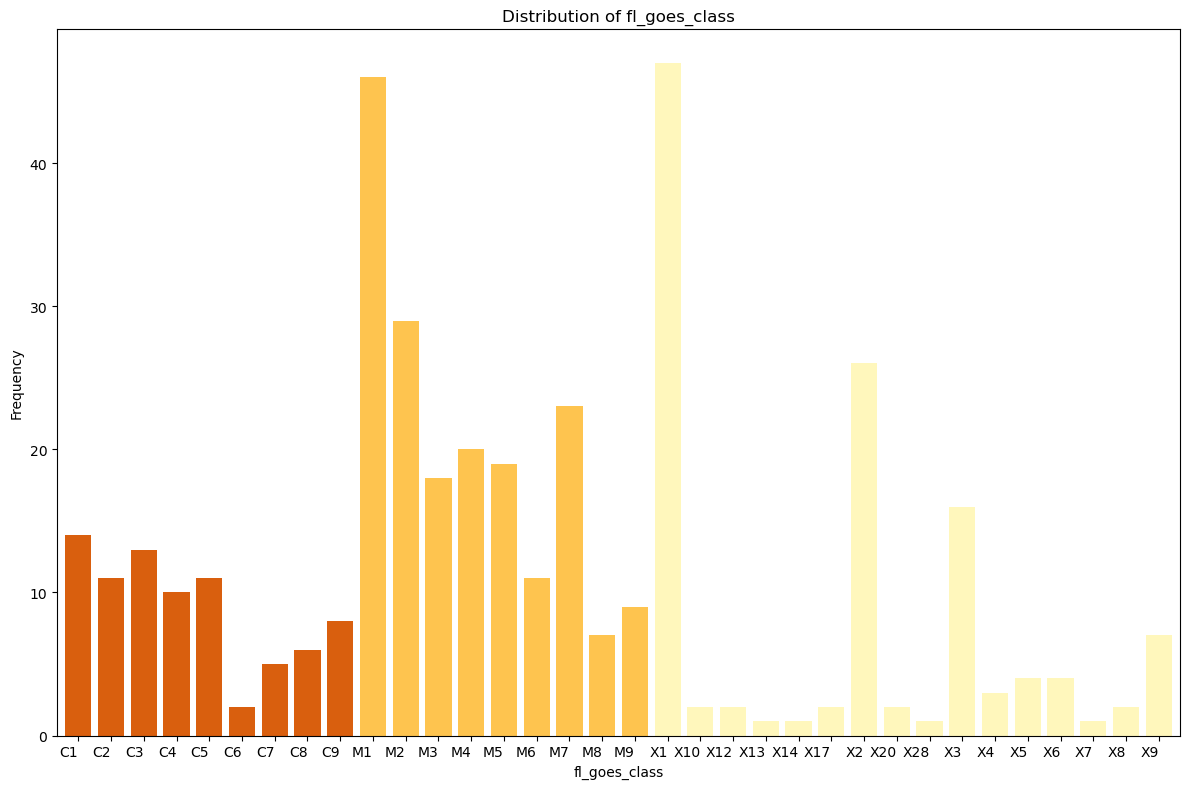

In [108]:
#distribution of data according the fl_goes_class

fl_goes_class_var=df_sep['fl_goes_class'].str.extract(r'([A-Za-z]\d+)')[0]
plt.figure(figsize=(12, 8))
color_map = {
    'X': '#fff7bc',    # For X classes
    'M': '#fec44f',   # For M classes
    'C': '#d95f0e'   # For C classes
}

df_fl_goes_class=pd.DataFrame({'fl_goes_class':fl_goes_class_var})
df_fl_goes_class = df_fl_goes_class.dropna(subset=['fl_goes_class'])
df_fl_goes_class['color'] = df_fl_goes_class['fl_goes_class'].str[0].map(color_map)
df_fl_goes_class['color'].fillna('#d3d3d3', inplace=True)
flare_counts = df_fl_goes_class['fl_goes_class'].value_counts().sort_index()
bar_colors = flare_counts.index.to_series().map(lambda x: df_fl_goes_class[df_fl_goes_class['fl_goes_class'] == x]['color'].iloc[0])
ax = flare_counts.plot(kind='bar', color=bar_colors, width=0.8)
plt.xticks(rotation=0, ha='right')  
plt.subplots_adjust(bottom=0.3)
plt.xlabel('fl_goes_class')
plt.ylabel('Frequency')
plt.title('Distribution of fl_goes_class')
plt.tight_layout()
plt.show()



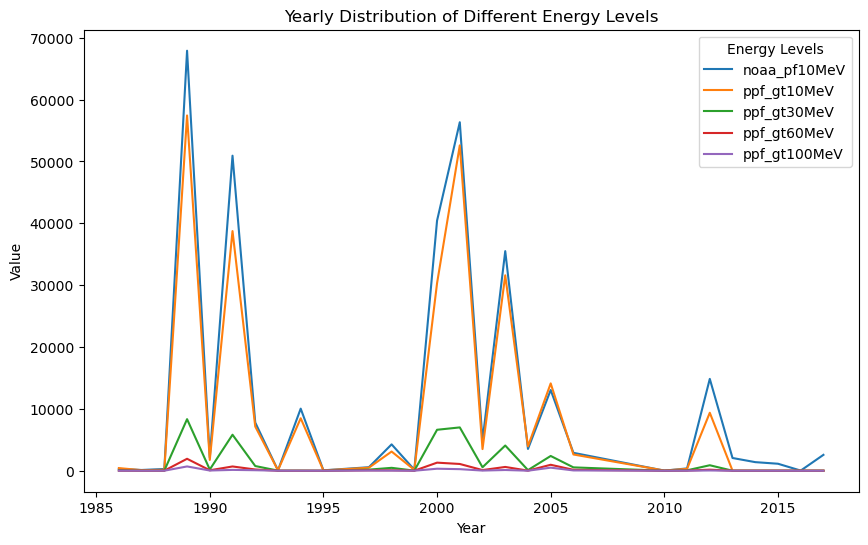

In [7]:
df_sep['date'] = pd.to_datetime(df_sep['timestamp'])

# Extract year from date
df_sep['year'] = df_sep['date'].dt.year

# Aggregate data by year
yearly_data = df_sep.groupby('year')[['noaa_pf10MeV', 'ppf_gt10MeV', 'ppf_gt30MeV', 'ppf_gt60MeV', 'ppf_gt100MeV']].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
for column in yearly_data.columns:
    plt.plot(yearly_data.index, yearly_data[column], label=column)

plt.title('Yearly Distribution of Different Energy Levels')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Energy Levels')

plt.show()

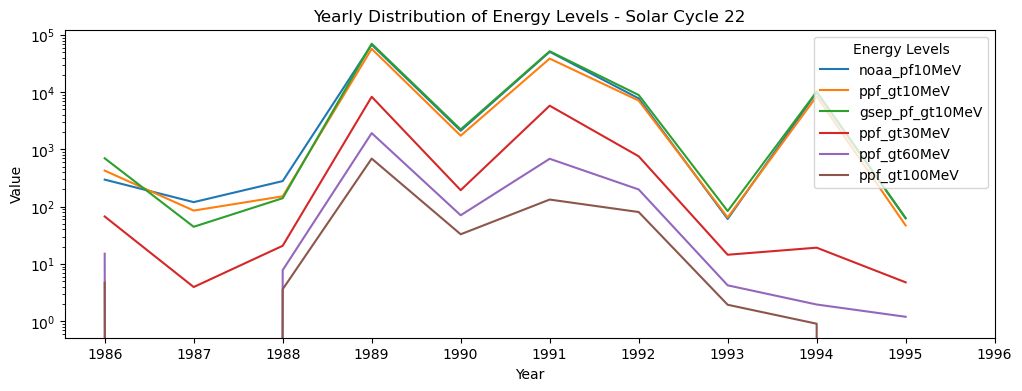

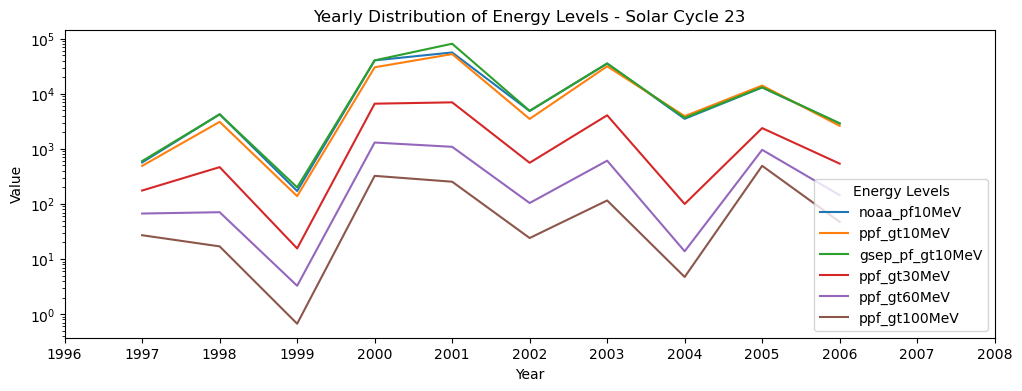

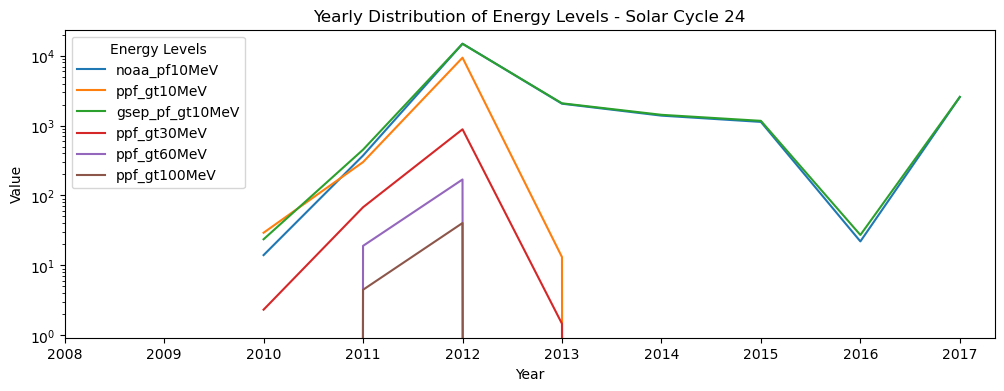

In [110]:
df_sep['date'] = pd.to_datetime(df_sep['date'])
df_sep['year'] = df_sep['date'].dt.year

#yearly distributions for a given solar cycle
def plot_yearly_distribution(start_year, end_year, cycle_name):
    cycle_data = df_sep[(df_sep['year'] >= start_year) & (df_sep['year'] <= end_year)]
    yearly_data = cycle_data.groupby('year')[['noaa_pf10MeV', 'ppf_gt10MeV','gsep_pf_gt10MeV','ppf_gt30MeV', 'ppf_gt60MeV', 'ppf_gt100MeV']].sum()

    plt.figure(figsize=(12, 4))
    for column in yearly_data.columns:
        plt.plot(yearly_data.index, yearly_data[column], label=column)

    plt.title(f'Yearly Distribution of Energy Levels - {cycle_name}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title='Energy Levels')
    plt.yscale('log')
    plt.xticks(np.arange(start_year, end_year + 1, 1))
    plt.show()

# Plot for Solar Cycle 22 (1986-1996)
plot_yearly_distribution(1986, 1996, 'Solar Cycle 22')

# Plot for Solar Cycle 23 (1996-2008)
plot_yearly_distribution(1996, 2008, 'Solar Cycle 23')

# Plot for Solar Cycle 24 (2008-2019)
plot_yearly_distribution(2008, 2017, 'Solar Cycle 24')

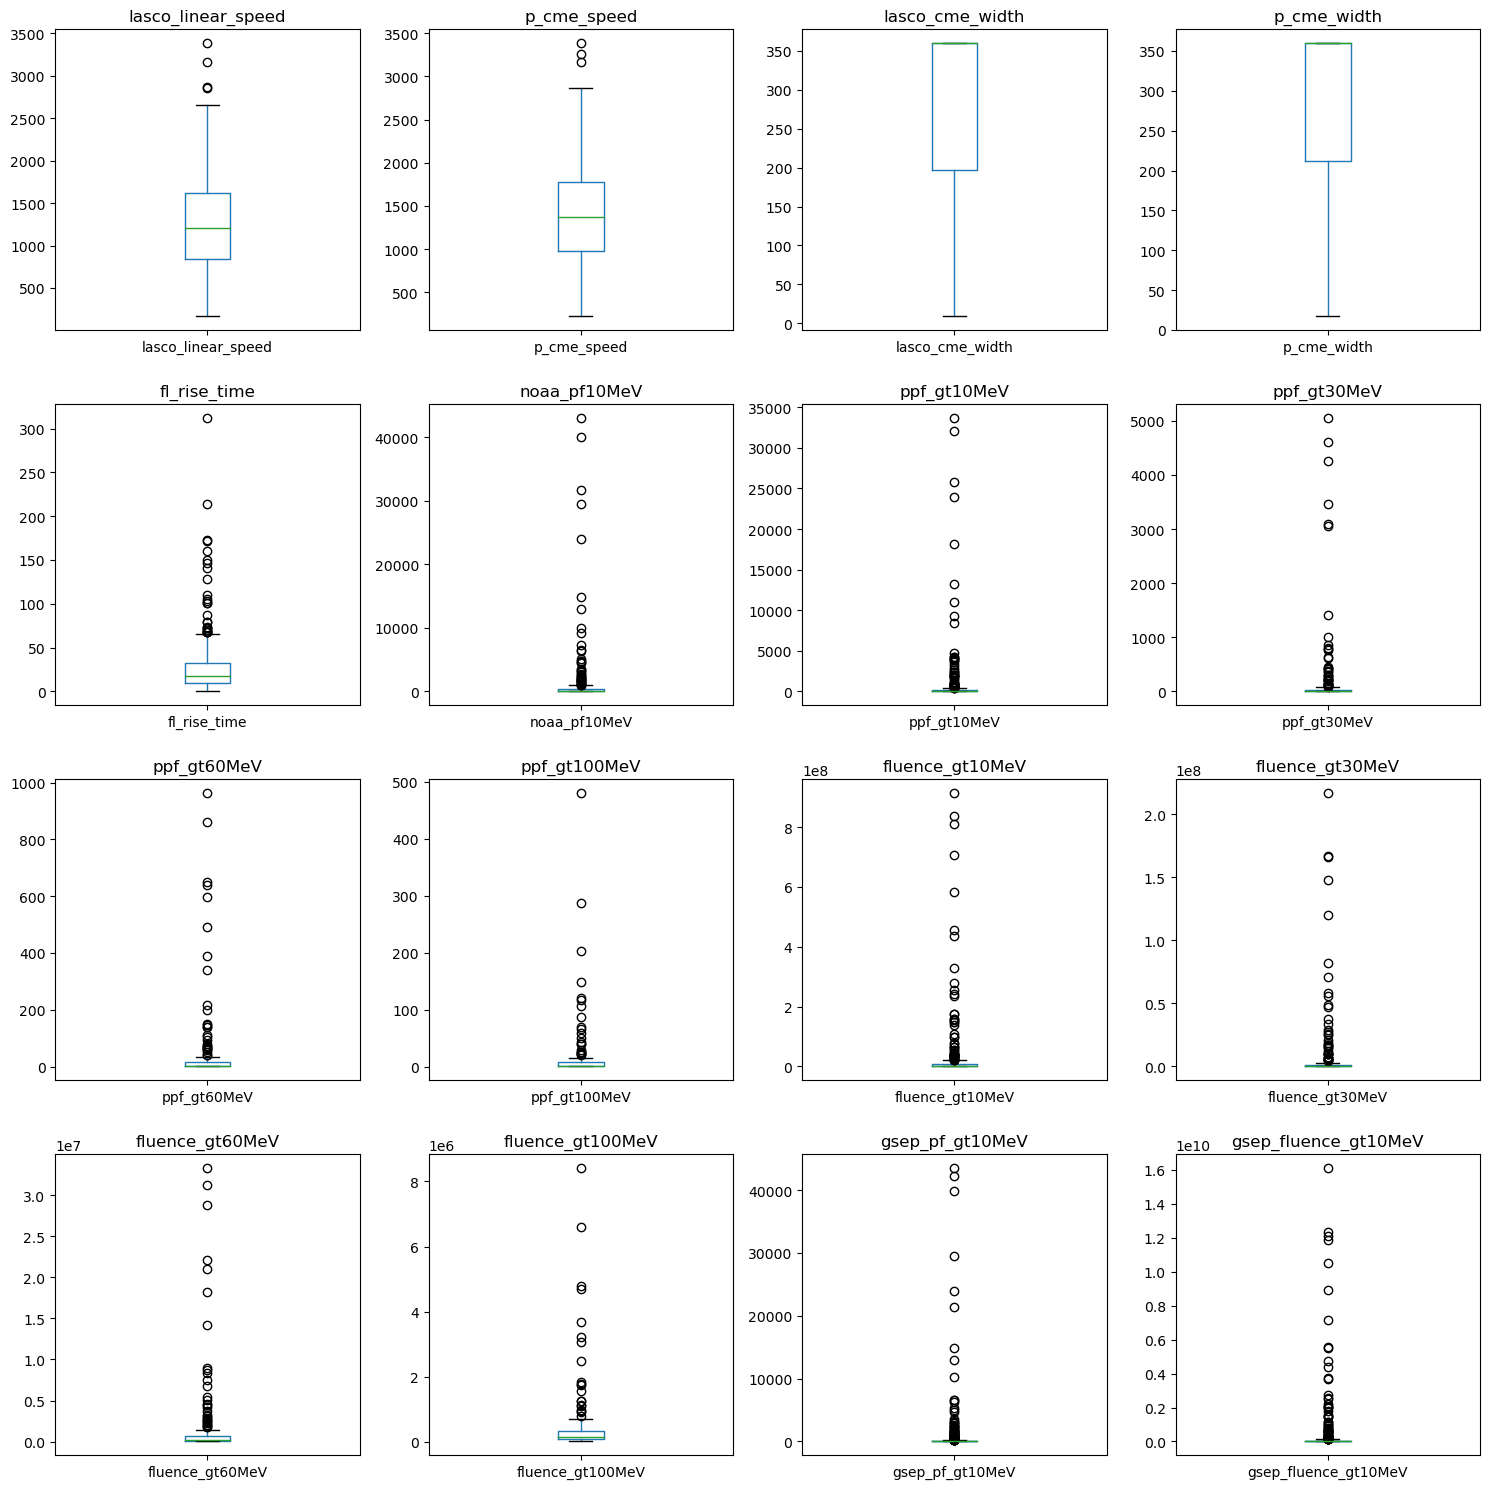

In [8]:
#Box plot for identifying outliers

def plot_boxplot(df, features):
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))
    axes = axes.flatten()
    i=0
    for col in features:
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col) 
        axes[i].grid(False)  
        i+=1

    plt.tight_layout()
    plt.show()

plot_boxplot(df_sep, sep_cont_var)


In [112]:
# #Box plot for identifying outliers

# fig,axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 8))  
# axes = axes.flatten()  
# i=0 
 
# df_sep_cont_copy=df_sep.copy()
# df_sep_cont_copy.dropna()

# for var in sep_cont_var:
#     var_lower_bound=df_sep_cont_dqr.loc['lower_bound',var]
#     var_upper_bound=df_sep_cont_dqr.loc['upper_bound',var]
#     df_sep_cont_copy[var]=df_sep_cont_copy[var].apply(lambda x: x if( x >= var_lower_bound and x <= var_upper_bound ) else None).dropna()
#     sns.boxplot(data=df_sep_cont_copy[var],ax=axes[i],color='#2b8cbe')
#     axes[i].set_title(f'{var}')
#     axes[i].set_yscale('log')
#     i+=1
# plt.tight_layout()
# plt.show()


# Removing Outliers 

In [113]:
# #store the indices of outlier values
# def outliers(df, dqr, ft):
#     ls = df.index[ (df[ft] < dqr.loc['lower_bound',ft]) | (df[ft] > dqr.loc['upper_bound',ft]) ]
#     return ls
    
# def remove_outliers(df, ls):
#     ls = sorted(set(ls))
#     #print(ls)
#     df = df.drop(ls)
#     return df

# sep_outlier_index_list=[]
# for var in sep_cont_var:
#     sep_outlier_index_list.extend(outliers(df_sep, df_sep_cont_dqr, var))
    
# df_sep_cleaned = remove_outliers(df_sep,index_list)
# df_sep_cleaned.shape

(324, 49)

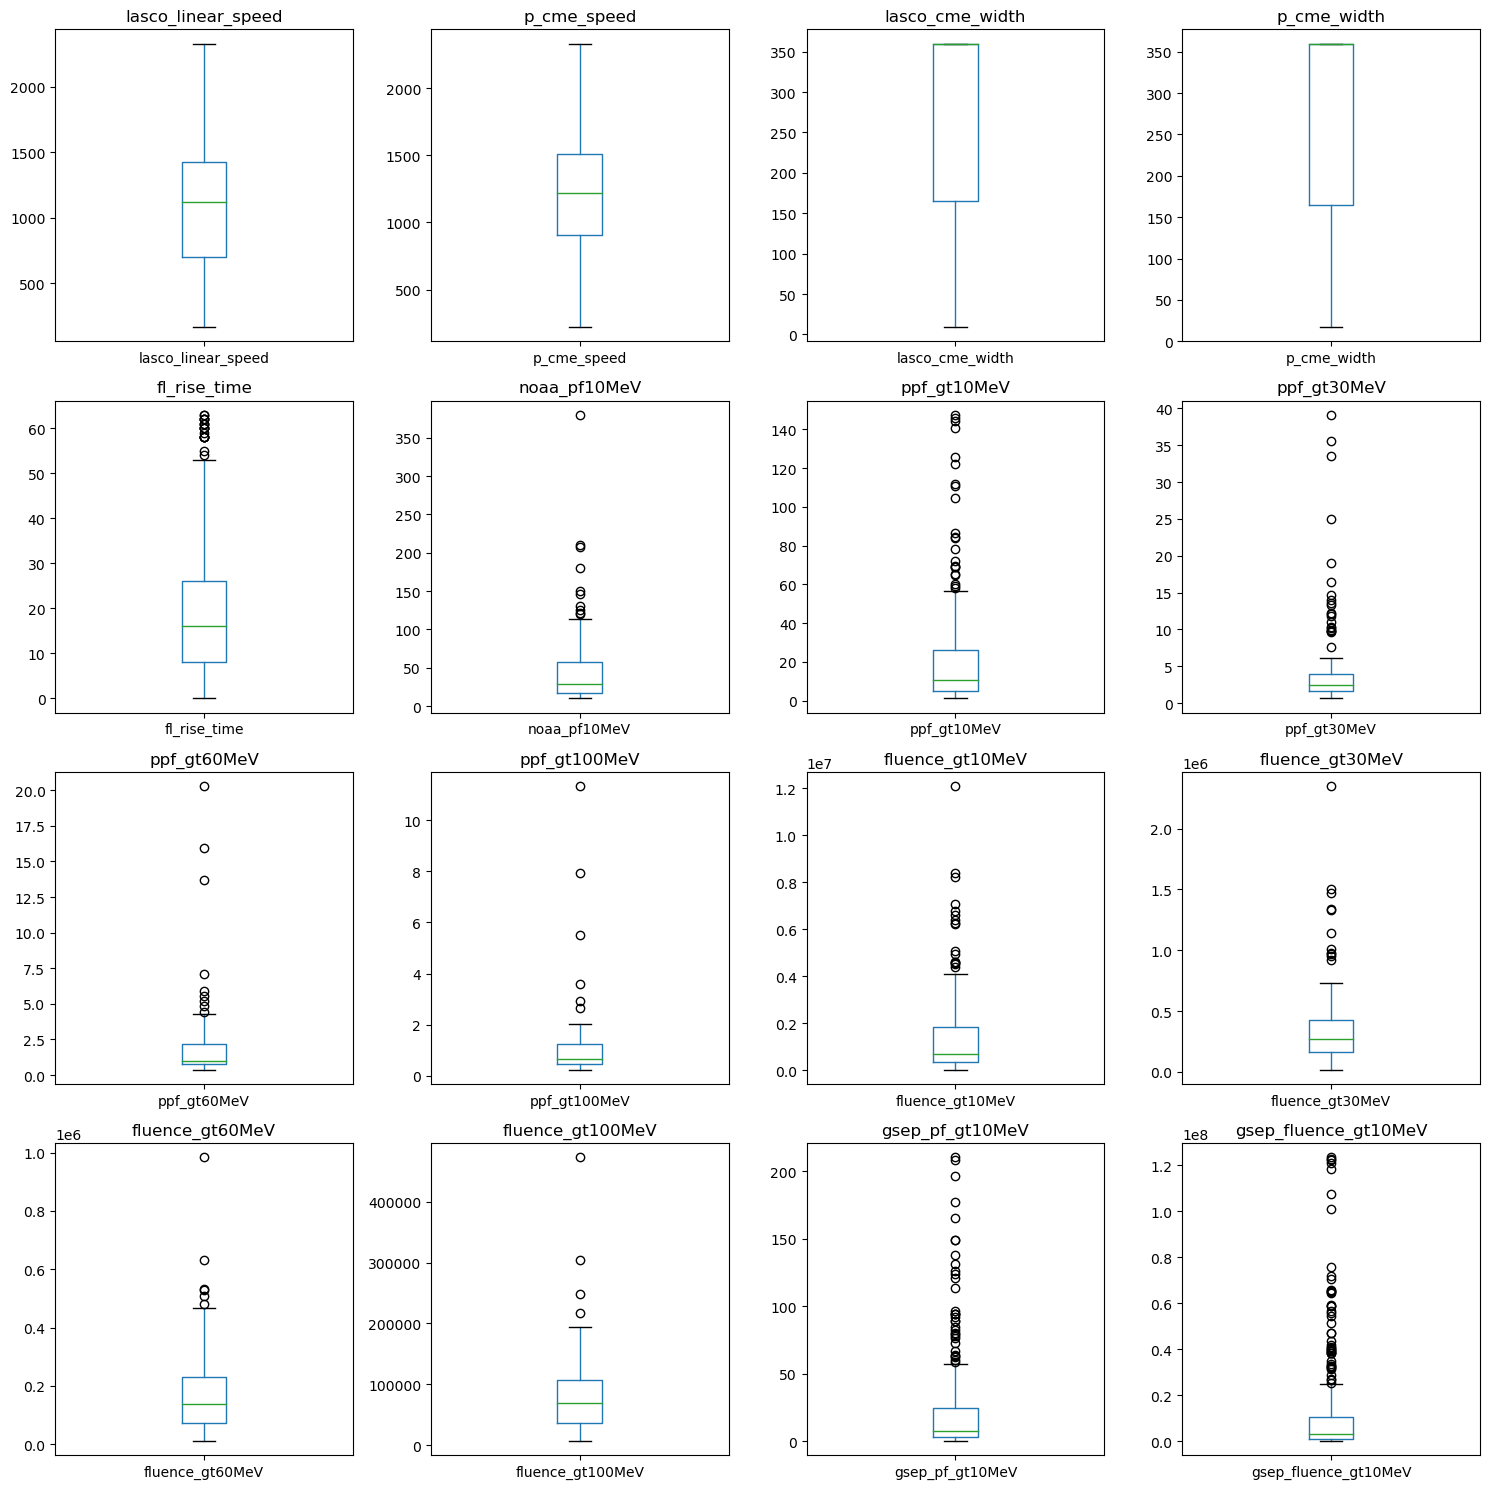

In [114]:
# plot_boxplot(df_sep_cleaned, sep_cont_var)

In [115]:
#df_sep_cleaned.isna()

,pp_index,cdaw_sep_id,timestamp,cdaw_start_time,cdaw_max_time,cdaw_evn_max,cme_id,cme_launch_time,cme_1st_app_time,lasco_cme_width,p_cme_width,lasco_linear_speed,p_cme_speed,fl_id,fl_start_time,fl_peak_time,fl_rise_time,fl_lon,fl_lat,fl_goes_class,noaa_ar,noaa_ar_uncertain,harpnum,noaa_pf10MeV,ppf_gt10MeV,ppf_gt30MeV,ppf_gt60MeV,ppf_gt100MeV,fluence_gt10MeV,fluence_gt30MeV,fluence_gt60MeV,fluence_gt100MeV,gsep_pf_gt10MeV,gsep_max_time,gsep_fluence_gt10MeV,m_type2_onset_time,dh_type2_onset_time,start_fr,noaa-sep_flag,Inst_category,Comments,Notes,Fe_e_p_shock_notes,gsep_notes,slice_start,slice_end,Flag,date,year
sep_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gsep_001,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,True,True,False,False,True,True,False,False,True,True,False,False,False,True,True,True,False,False,True,True,True,False,False,False,False,False,False
gsep_002,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,True,True,True,False,False,False,True,True,True,False,False,True,True,True,False,False,False,False,False,False
gsep_003,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,False,False,False,False,False,False
gsep_004,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
gsep_005,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,False,False,False,False,False,False
gsep_006_1,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,False,False,True,True,True,True,False,False,False,False,False
gsep_007,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,True,True,False,False,True,False,True,False,False,False,False,False,False
gsep_008,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,True,True,False,False,False,False,False,False
gsep_008_1,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,False,False,True,True,True,False,False,False,False,False,False


In [9]:
# df_sep_cleaned = df_sep_cleaned.interpolate(method='linear',limit_direction="backward")
# df_sep_cleaned = df_sep_cleaned.interpolate(method='linear',limit_direction="forward")

# Normalization

In [97]:
# df_sep_cleaned[sep_cont_var] = df_sep_cleaned[sep_cont_var].applymap(lambda x: x if x > 0 else 1)
# df_sep_cleaned[sep_cont_var] = np.log10(df_sep_cleaned[sep_cont_var])
# df_sep_cleaned

In [98]:
# import os
# os.environ["OMP_NUM_THREADS"] = "2"

# Model Training

In [10]:
from sklearn.cluster import KMeans


desc_features = sep_cont_var

kmeans = KMeans(n_clusters=4, n_init=16, random_state=42)
df_sep_cleaned['cluster'] = kmeans.fit_predict(df_sep_cleaned[sep_cont_var])

from sklearn.tree import DecisionTreeClassifier
#dt_clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy', random_state = 30)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(df_sep_cleaned[desc_features],df_sep_cleaned['cluster'])



NameError: name 'df_sep_cleaned' is not defined

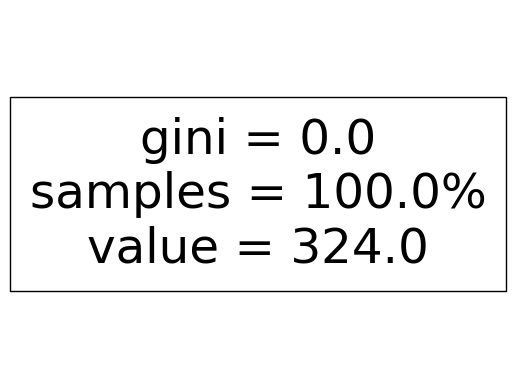

In [118]:
from sklearn import tree

ax=tree.plot_tree(dt_clf, feature_names=desc_features,filled=True, proportion='True')

In [119]:
Y_pred=dt_clf.predict(X_test)
Y_pred

NameError: name 'X_test' is not defined

In [120]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

NameError: name 'Y_test' is not defined

In [121]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

cm_df = pd.DataFrame(cm)
cm_df

NameError: name 'Y_test' is not defined

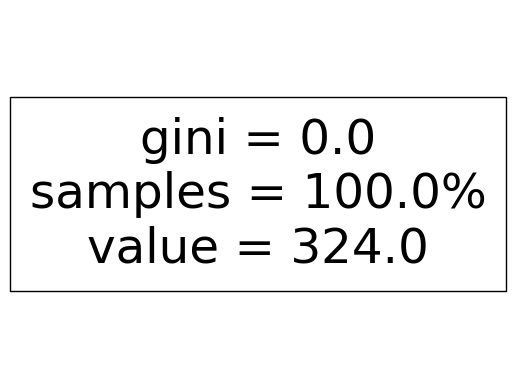

In [122]:
from sklearn import tree

ax=tree.plot_tree(dt_clf, feature_names=desc_features, class_names=['0','1'],
               filled=True, proportion='True')

# Imputing Missing Values as per the Solar flare Class

In [172]:
fl_goes_class_var=df_sep['fl_goes_class'].str.extract(r'([A-Za-z]\d+)')[0]
fl_goes_unique_class=fl_goes_class_var.sort_values().unique()
df_sep['fl_goes_class_broad']=df_sep['fl_goes_class'].str.extract(r'([A-Za-z]\d+)')[0]
df_sep_copy=df_sep.copy()
df_cont_var_mean = pd.DataFrame(columns=sep_cont_var)
#class_mean = df.groupby('class')['values'].transform('mean')
for var in sep_cont_var:
    df_cont_var_mean[var]=df_sep.groupby('fl_goes_class_broad')[var].transform('mean')
    df_sep_copy[var].fillna(df_cont_var_mean[var])

#print(f"var:{df_cont_var_mean}")
print(f"filled:{df_cont_var_mean}")





filled:            lasco_linear_speed  p_cme_speed  lasco_cme_width  p_cme_width  \
sep_index                                                                   
gsep_001           1844.000000  1779.285714       360.000000   325.714286   
gsep_002           1393.272727  1540.428571       289.272727   287.666667   
gsep_003           1317.565217  1456.526316       325.695652   330.647059   
gsep_004           1228.230769  1188.000000       300.769231   272.100000   
gsep_005           1260.800000  1263.666667       314.000000   283.333333   
gsep_006           1226.571429  1237.833333       276.857143   296.000000   
gsep_006_1                 NaN          NaN              NaN          NaN   
gsep_007           1002.833333  1148.666667       330.666667   301.333333   
gsep_008           1078.961538  1180.200000       267.884615   262.684211   
gsep_008_1                 NaN          NaN              NaN          NaN   
gsep_009           1078.961538  1180.200000       267.884615   262.68

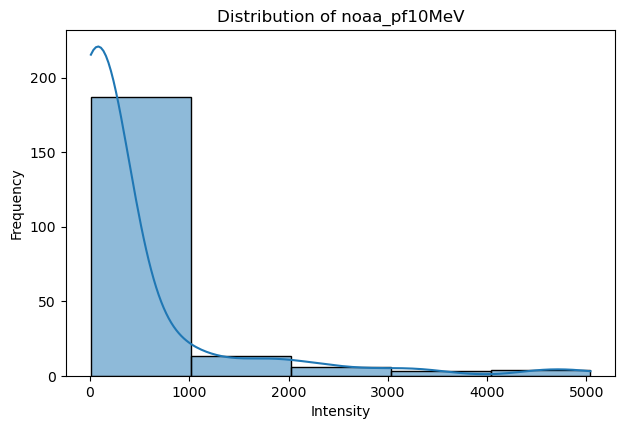

In [141]:
fields_to_plot = ['noaa_pf10MeV']
                  #,'ppf_gt10MeV', 'fluence_gt10MeV', 'gsep_fluence_gt10MeV']


plt.figure(figsize=(12,8))
for i, field in enumerate(fields_to_plot, 1):
    plt.subplot(2, 2, i)
    #z_scale_normalized
    df_sep_trimmed=df_sep[field].apply(lambda x: x if x <6000 else None).dropna()
    sns.histplot(df_sep_trimmed, kde=True, bins=5)  # Drop NaNs for better visualization
    plt.title(f'Distribution of {field}')
    #plt.xscale('log')
    #(df_receipts_norm[year] - df_receipts_norm[year].mean())/df_receipts_norm[year].std()
        
    plt.yticks() 
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()